In [2]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)


****RSNA Dataset Description**** 

The dataset contains 54,706 entries with 14 columns, each representing a specific attribute related to patient and medical imaging information.

****Exploratory Data Analysis****

In [3]:
import pandas as pd 

# Path to the CSV file
rsna_path = '//kaggle/input/rsna-breast-cancer-detection/train.csv'

# Read the CSV file into a DataFrame
df_rsna = pd.read_csv(rsna_path)

df_rsna.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [4]:
# Display basic info
df_rsna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

**Missing Values Analysis**

In [5]:
# Checking missing values in each column
missing_values = df_rsna.isnull().sum()
print("Missing Values in each column:\n", missing_values)

Missing Values in each column:
 site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64


In [6]:
# Summary statistics for both numerical and categorical columns
summary_statistics = df_rsna.describe(include='all')
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
              site_id    patient_id      image_id laterality   view  \
count   54706.000000  54706.000000  5.470600e+04      54706  54706   
unique           NaN           NaN           NaN          2      6   
top              NaN           NaN           NaN          R    MLO   
freq             NaN           NaN           NaN      27439  27903   
mean        1.460407  32698.865262  1.079386e+09        NaN    NaN   
std         0.498434  18893.861534  6.183269e+08        NaN    NaN   
min         1.000000      5.000000  6.849100e+04        NaN    NaN   
25%         1.000000  16481.000000  5.458153e+08        NaN    NaN   
50%         1.000000  32432.000000  1.082689e+09        NaN    NaN   
75%         2.000000  48999.000000  1.613228e+09        NaN    NaN   
max         2.000000  65534.000000  2.147472e+09        NaN    NaN   

                 age        cancer        biopsy      invasive        BIRADS  \
count   54669.000000  54706.000000  54706.000000  54706.00

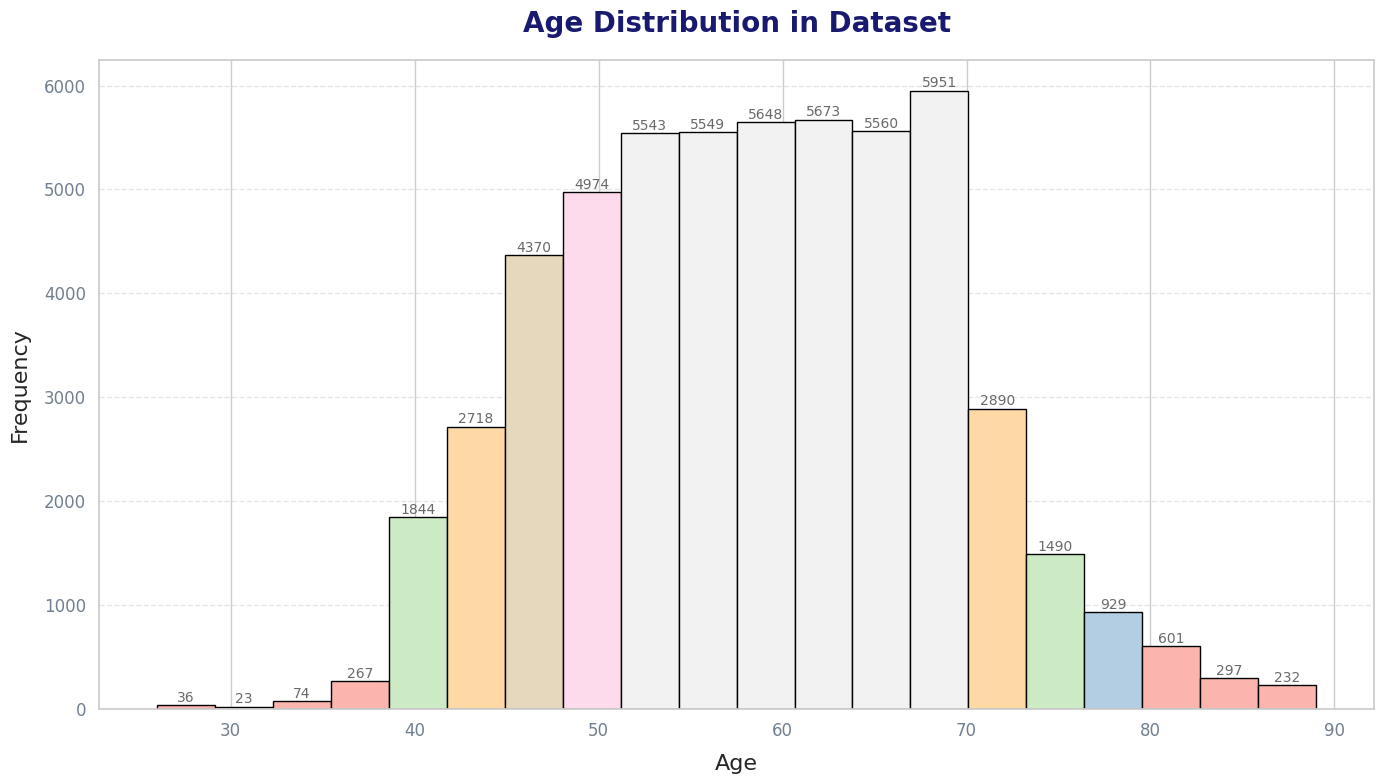

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a high-quality style for the plot
sns.set(style="whitegrid")

# Plotting the distribution of 'age' with advanced styling
plt.figure(figsize=(14, 8))
n, bins, patches = plt.hist(df_rsna['age'].dropna(), bins=20, edgecolor='black', color='lightpink', alpha=1.0)

# Title and labels
plt.title('Age Distribution in Dataset', fontsize=20, fontweight='bold', color='midnightblue', pad=20)
plt.xlabel('Age', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)

# Apply a pastel color gradient to the bars
bin_centers = 0.5 * (bins[:-1] + bins[1:])
colormap = plt.cm.Pastel1  # Choose a pastel color map
for count, patch in zip(n, patches):
    plt.setp(patch, 'facecolor', colormap((count - np.min(n)) / np.ptp(n)))

# Adding a grid and text annotations for visual appeal
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add annotations on top of each bar
for count, x in zip(n, bin_centers):
    plt.text(x, count + 2, f'{int(count)}', ha='center', va='bottom', fontsize=10, color='dimgray')

# Customizing tick parameters
plt.xticks(fontsize=12, color='slategray')
plt.yticks(fontsize=12, color='slategray')

plt.tight_layout()
plt.show()

****Distribution of Density in dataset****    
****//We can see that the density distribution of the dataset is not dritributed equally which may cause lac of data to train the ML model, for the TYPE which has less data(here A & D)****

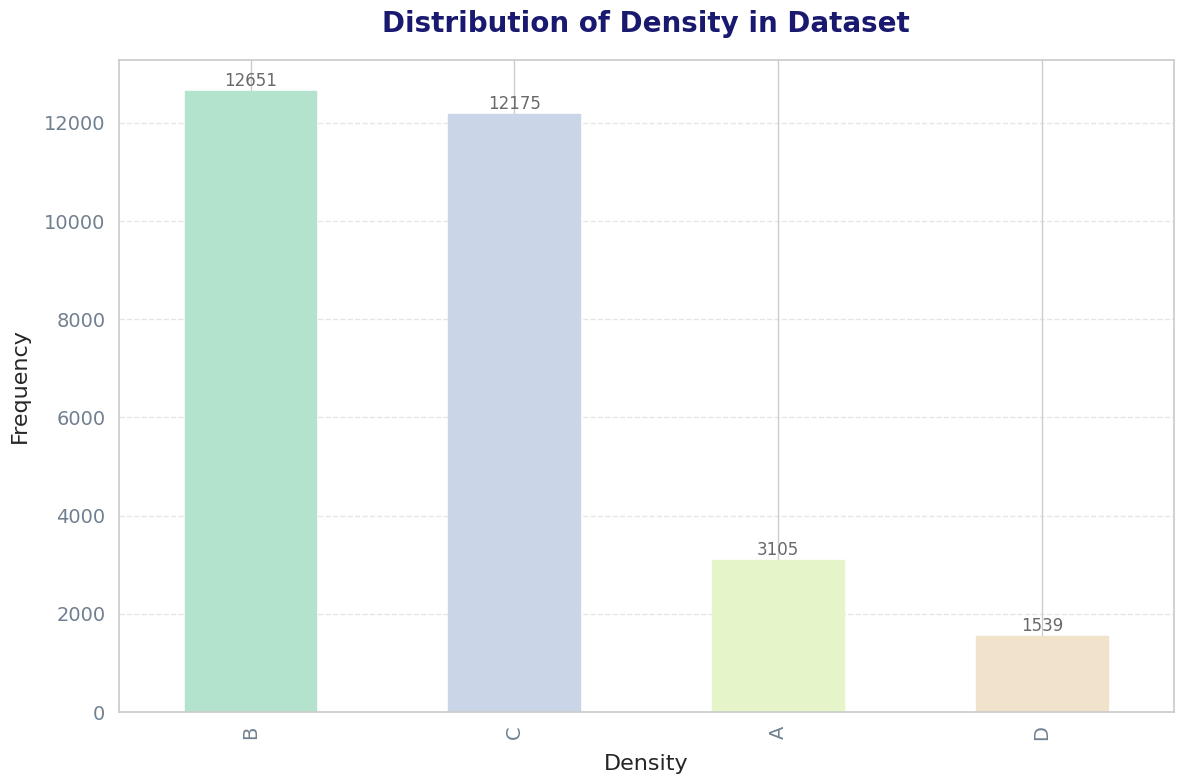

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a high-quality style with pastel tones
sns.set(style="whitegrid")

# Plotting the distribution of 'density' with enhancements
plt.figure(figsize=(12, 8))
density_counts = df_rsna['density'].value_counts()
bars = density_counts.plot(kind='bar', edgecolor='black', color='coral', alpha=1.0)

# Title and labels
plt.title('Distribution of Density in Dataset', fontsize=20, fontweight='bold', color='midnightblue', pad=20)
plt.xlabel('Density', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)

# Add pastel colors to the bars
colormap = plt.cm.Pastel2  # Pastel colormap
for i, bar in enumerate(bars.containers[0]):  # Apply color gradient
    bar.set_color(colormap(i / len(density_counts)))

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding annotations on top of each bar
for i, (density, count) in enumerate(density_counts.items()):
    plt.text(i, count + 20, f'{count}', ha='center', va='bottom', fontsize=12, color='dimgray')

# Customizing tick parameters
plt.xticks(fontsize=14, color='slategray')
plt.yticks(fontsize=14, color='slategray')

plt.tight_layout()
plt.show()

# Take Away from dataset Exploration:        
**1. Missing Values Analysis:** Remove rows where density is missing           
**2. Remove Implants:** Filter out rows where implants == 1           
**3. Dataset Imbalance:** A and D have least amount of images           
**4. Dataset Split:** Split dataset into train, val, test               
**5. Label Encoding:** Encode categorical labels into numeric e.g. A=0, B=1, C=2, D=3             
**6. Data Augmentation and Batch Generation:** Handling image data and feed it into deep learning   model

# Preprocessing

**Missing Values Analysis: Remove rows where density is missing/NaN**

In [9]:
# Count the total number of rows before removing missing density values
total_rows_before = len(df_rsna)
print("Total rows before removing missing density values:", total_rows_before)

# Step 1: Drop rows with missing target variable (density)
df_rsna_preprocessed = df_rsna.dropna(subset=['density'])

# Count the total number of rows after removing missing density values
total_rows_after = len(df_rsna_preprocessed)
print("Total rows after removing missing density values:", total_rows_after)

# Display the first few rows of the DataFrame after removal
df_rsna_preprocessed.head()

Total rows before removing missing density values: 54706
Total rows after removing missing density values: 29470


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
12,1,10038,1967300488,L,MLO,60.0,0,0,0,1.0,0,C,216,False
13,1,10038,2142944869,L,CC,60.0,0,0,0,1.0,0,C,216,False
14,1,10038,850559196,R,MLO,60.0,0,0,0,1.0,0,C,216,False
15,1,10038,1350492010,R,CC,60.0,0,0,0,1.0,0,C,216,False
16,1,10042,102733848,L,CC,51.0,0,0,0,1.0,0,C,93,False


**Remove Implants: Filter out rows where implants == 1**

In [10]:
# Count the total number of rows before removal
total_rows_before = len(df_rsna_preprocessed)
print("Total rows before removing implants:", total_rows_before)

# Count the number of rows with implants
implant_count = df_rsna_preprocessed[df_rsna_preprocessed['implant'] == 1].shape[0]
print("Number of rows with implants (implant == 1):", implant_count)

# Remove rows with implants
df_rsna_preprocessed = df_rsna_preprocessed[df_rsna_preprocessed['implant'] == 0]

# Count the total number of rows after removal
total_rows_after = len(df_rsna_preprocessed)
print("Total rows after removing implants:", total_rows_after)

# Display the first few rows to confirm changes
df_rsna_preprocessed.head()

Total rows before removing implants: 29470
Number of rows with implants (implant == 1): 1460
Total rows after removing implants: 28010


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
12,1,10038,1967300488,L,MLO,60.0,0,0,0,1.0,0,C,216,False
13,1,10038,2142944869,L,CC,60.0,0,0,0,1.0,0,C,216,False
14,1,10038,850559196,R,MLO,60.0,0,0,0,1.0,0,C,216,False
15,1,10038,1350492010,R,CC,60.0,0,0,0,1.0,0,C,216,False
16,1,10042,102733848,L,CC,51.0,0,0,0,1.0,0,C,93,False


**Label Encoding: Encode categorical labels into numeric e.g. A=0, B=1, C=2, D=3**

In [11]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Encode Density (if density is categorical)
# Assuming density categories are "A", "B", "C", etc.
label_encoder = LabelEncoder()
df_rsna_preprocessed['density_encoded'] = label_encoder.fit_transform(df_rsna_preprocessed['density'])

In [12]:
df_rsna_preprocessed.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,density_encoded
12,1,10038,1967300488,L,MLO,60.0,0,0,0,1.0,0,C,216,False,2
13,1,10038,2142944869,L,CC,60.0,0,0,0,1.0,0,C,216,False,2
14,1,10038,850559196,R,MLO,60.0,0,0,0,1.0,0,C,216,False,2
15,1,10038,1350492010,R,CC,60.0,0,0,0,1.0,0,C,216,False,2
16,1,10042,102733848,L,CC,51.0,0,0,0,1.0,0,C,93,False,2


**Saving the CSV**

In [13]:
# Saving df_rsna_preprocessed to a CSV file
output_path = '/kaggle/working/df_rsna_preprocessed.csv'
df_rsna_preprocessed.to_csv(output_path, index=False)
print("File saved to:", output_path)

File saved to: /kaggle/working/df_rsna_preprocessed.csv


How the dataset actually looks like

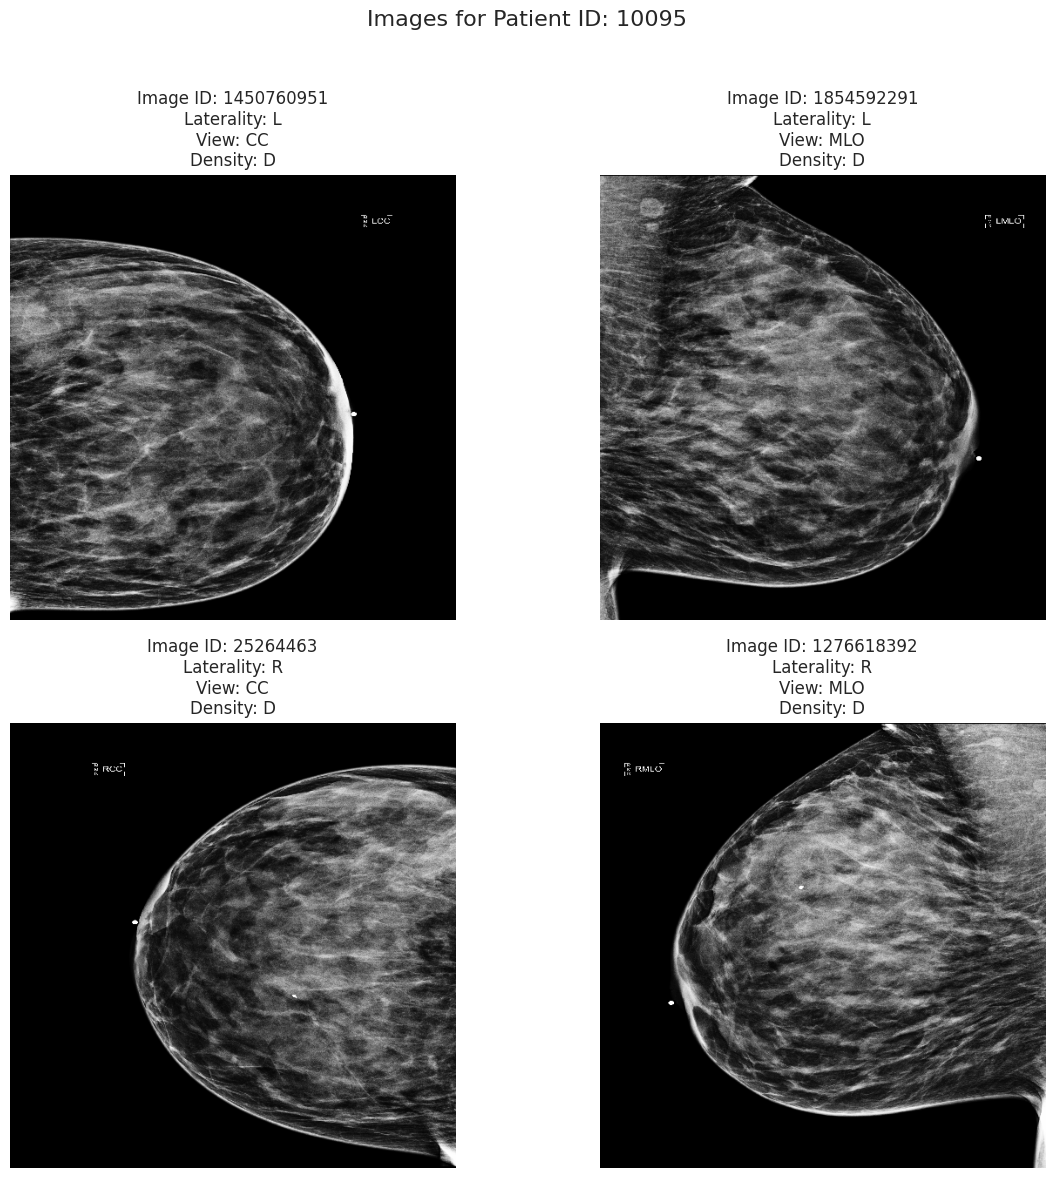

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the patient ID to display
patient_id_to_display = 10095  

# Filter for the specific patient and required views
patient_data = df_rsna_preprocessed[(df_rsna_preprocessed['patient_id'] == patient_id_to_display) &
                                    (((df_rsna_preprocessed['laterality'] == 'R') & (df_rsna_preprocessed['view'] == 'CC')) |
                                     ((df_rsna_preprocessed['laterality'] == 'L') & (df_rsna_preprocessed['view'] == 'CC')) |
                                     ((df_rsna_preprocessed['laterality'] == 'R') & (df_rsna_preprocessed['view'] == 'MLO')) |
                                     ((df_rsna_preprocessed['laterality'] == 'L') & (df_rsna_preprocessed['view'] == 'MLO')))]

# Select the first image for each unique combination of `laterality` and `view`
patient_data_unique_views = patient_data.drop_duplicates(subset=['laterality', 'view'])

# Check if we have exactly 4 images (one for each combination of view and laterality)
if len(patient_data_unique_views) == 4:
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(f"Images for Patient ID: {patient_id_to_display}", fontsize=16)
    
    for i, (idx, row) in enumerate(patient_data_unique_views.iterrows()):
        # Load image based on image_id
        image_path = f"/kaggle/input/rsna-breast-cancer-512-pngs/{row['patient_id']}_{row['image_id']}.png"  # Update path and extension as needed
        img = mpimg.imread(image_path)
        
        # Position in 2x2 grid
        ax = axes[i // 2, i % 2]
        
        # Display image and metadata
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"Image ID: {row['image_id']}\n"
                     f"Laterality: {row['laterality']}\n"
                     f"View: {row['view']}\n"
                     f"Density: {row['density']}", fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()
else:
    print("Could not find exactly 4 unique images (one per view) for this patient.")

# DataSet splitting

<function matplotlib.pyplot.yticks(ticks=None, labels=None, *, minor=False, **kwargs)>

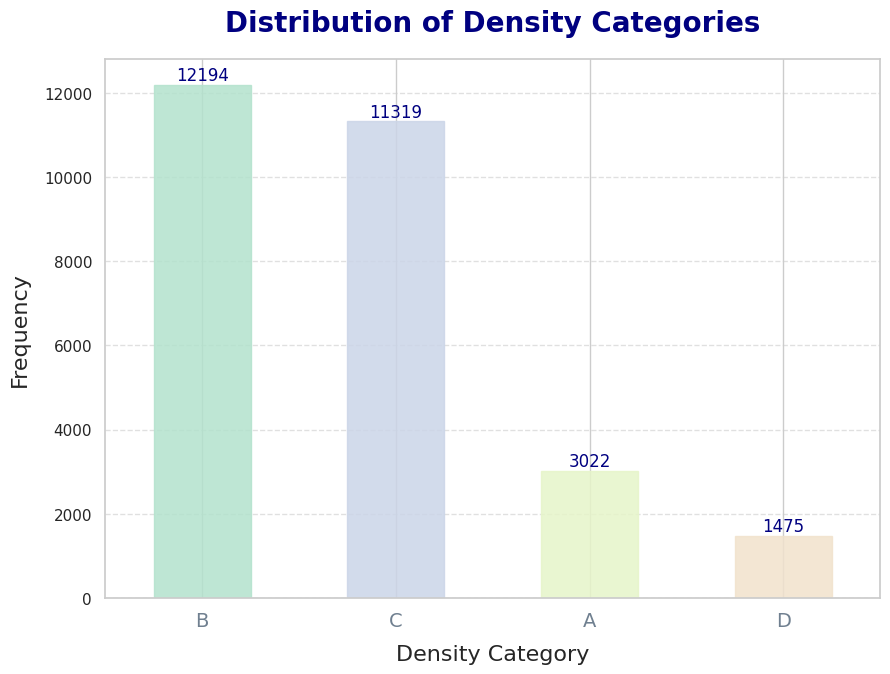

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a high-quality style with pastel tones
sns.set(style="whitegrid")

# Plotting the distribution of 'density' categories with enhancements
plt.figure(figsize=(10, 7))
density_counts = df_rsna_preprocessed['density'].value_counts()
bars = density_counts.plot(kind='bar', color='lightsteelblue', edgecolor='black', alpha=0.85)

# Title and labels
plt.title('Distribution of Density Categories', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Density Category', fontsize=16, labelpad=10)
plt.ylabel('Frequency', fontsize=16, labelpad=10)

# Adding a pastel color gradient to the bars
colormap = plt.cm.Pastel2
for i, bar in enumerate(bars.containers[0]):
    bar.set_color(colormap(i / len(density_counts)))

# Adding a dashed grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adding annotations on top of each bar for counts
for i, (density, count) in enumerate(density_counts.items()):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontsize=12, color='navy')

# Customizing ticks
plt.xticks(fontsize=14, color='slategray', rotation=0)
plt.yticks

**Displayinng the count of Image in each Density category**

In [16]:
# Display the count of images in each 'density' category
image_count_per_density = df_rsna_preprocessed['density'].value_counts()

# Print the count of images per density category
print("Count of images in each density category:")
print(image_count_per_density)


Count of images in each density category:
density
B    12194
C    11319
A     3022
D     1475
Name: count, dtype: int64


**Keeping 80% data for training, 10% for validation and 10% for testing**

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (if not already loaded)
df = df_rsna_preprocessed  # Assuming df_rsna_preprocessed is your main DataFrame

# Step 1: Group by patient_id and sample to ensure unique patients in each set
# We'll use `density` for stratification since that’s our target

# Extract unique patients with their associated densities (majority class per patient)
patient_data = df.groupby('patient_id')['density'].agg(lambda x: x.mode()[0]).reset_index()

# Step 2: Perform stratified sampling to split patients into train, val, and test

# First, split into 80% training and 20% temp (which will later be split into val and test)
train_patients, temp_patients = train_test_split(
    patient_data, test_size=0.2, stratify=patient_data['density'], random_state=42
)

# Next, split the temp set into 50% validation and 50% test (which is 10% each of the original dataset)
val_patients, test_patients = train_test_split(
    temp_patients, test_size=0.5, stratify=temp_patients['density'], random_state=42
)

# Step 3: Map the patient splits back to the main DataFrame

# Filter the main DataFrame for each set
train_df = df[df['patient_id'].isin(train_patients['patient_id'])]
val_df = df[df['patient_id'].isin(val_patients['patient_id'])]
test_df = df[df['patient_id'].isin(test_patients['patient_id'])]

# Display the sizes of each split
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

# Optionally, save these sets to CSVs
train_df.to_csv('/kaggle/working/train_df.csv', index=False)
val_df.to_csv('/kaggle/working/val_df.csv', index=False)
test_df.to_csv('/kaggle/working/test_df.csv', index=False)

print("Datasets saved successfully.")

Training set size: 22431
Validation set size: 2760
Test set size: 2819
Datasets saved successfully.


**Category-wise Image counts in each set**

In [18]:
# Category-wise image counts in each set
train_category_counts = train_df['density'].value_counts()
val_category_counts = val_df['density'].value_counts()
test_category_counts = test_df['density'].value_counts()

# Display category-wise counts
print("Category-wise image counts in each set:")
print("Training set:\n", train_category_counts)
print("\nValidation set:\n", val_category_counts)
print("\nTest set:\n", test_category_counts)

Category-wise image counts in each set:
Training set:
 density
B    9769
C    9067
A    2423
D    1172
Name: count, dtype: int64

Validation set:
 density
B    1198
C    1116
A     301
D     145
Name: count, dtype: int64

Test set:
 density
B    1227
C    1136
A     298
D     158
Name: count, dtype: int64


In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

class BreastDensityDataset(Dataset):
    def __init__(self, csv_file, img_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the CSV file with annotations.
            img_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on an image.
        """
        self.data = pd.read_csv(csv_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get patient_id, image_id, and density label
        patient_id = self.data.iloc[idx]['patient_id']
        image_id = self.data.iloc[idx]['image_id']
        label = self.data.iloc[idx]['density_encoded']  # Using the existing encoded label directly
        
        # Construct the file path with {patient_id}_{image_id}.png
        img_path = os.path.join(self.img_dir, f"{patient_id}_{image_id}.png")
        
        # Load the image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        
        # Apply transformations if specified
        if self.transform:
            # Apply Albumentations transform, which requires a dictionary
            image = self.transform(image=image)["image"]
        
        return image, label, patient_id, image_id

In [20]:
# Directory containing images
img_dir = "/kaggle/input/rsna-breast-cancer-512-pngs"  # Update this path to your image folder

# Paths to CSV files for each dataset split
train_csv = '/kaggle/working/train_df.csv'
val_csv = '/kaggle/working/val_df.csv'
test_csv = '/kaggle/working/test_df.csv'

**Checking for duplicates in each of the train, validation, and test sets based on 'patient_id' and 'image_id' combination**

In [21]:
# Checking for duplicates in each of the train, validation, and test sets based on 'patient_id' and 'image_id' combination

train_duplicates = train_df.duplicated(subset=['patient_id', 'image_id']).sum()
val_duplicates = val_df.duplicated(subset=['patient_id', 'image_id']).sum()
test_duplicates = test_df.duplicated(subset=['patient_id', 'image_id']).sum()

# Displaying the results
print("Number of duplicates in Training set:", train_duplicates)
print("Number of duplicates in Validation set:", val_duplicates)
print("Number of duplicates in Test set:", test_duplicates)

Number of duplicates in Training set: 0
Number of duplicates in Validation set: 0
Number of duplicates in Test set: 0


In [22]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
import cv2

# Albumentations transformations for training
train_transform = A.Compose([
    A.Resize(224, 224),  # Resize to 299x299 for InceptionV3
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, p=0.5),
    A.MedianBlur(blur_limit=5, p=0.1),
    A.GaussianBlur(blur_limit=(3, 7), p=0.1),
    A.GaussNoise(p=0.2),
    A.ElasticTransform(p=0.1),
    A.GridDistortion(p=0.1),
    A.OpticalDistortion(p=0.1),
    A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# Albumentations transformations for validation and test (without augmentation)
val_test_transform = A.Compose([
    A.Resize(224, 224),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])



# Create dataset instances
train_dataset = BreastDensityDataset(csv_file=train_csv, img_dir=img_dir, transform=train_transform)
val_dataset = BreastDensityDataset(csv_file=val_csv, img_dir=img_dir, transform=val_test_transform)
test_dataset = BreastDensityDataset(csv_file=test_csv, img_dir=img_dir, transform=val_test_transform)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipykernel_37/4177541839.py:19: UserWarning: Argument(s) 'max_holes, max_height, max_width' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=8, max_height=32, max_width=32, p=0.5),


**Checking that how will it look like in the train, validation and test dataset**

**VIEW OF TRAIN DATASET**

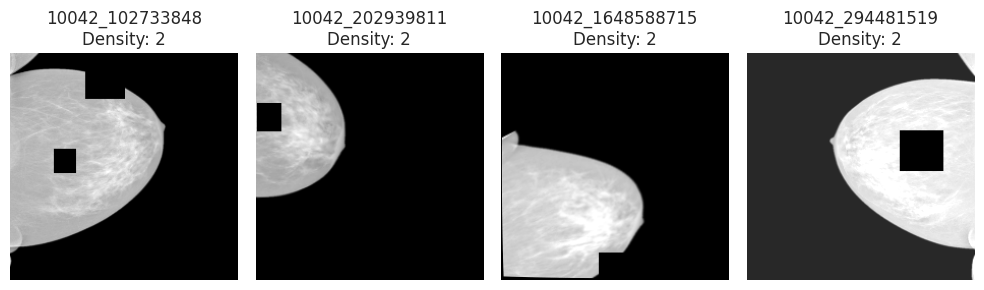

In [23]:
import matplotlib.pyplot as plt

# Function to display a few images from the dataset with {patient_id}_{image_id} and density
def display_sample_images(dataset, num_images=4):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        # Get a sample from the dataset
        image, label, patient_id, image_id = dataset[i]
        
        # Convert to grayscale by taking only one channel, e.g., the first channel
        image = image[0]  # Assuming the image is (3, H, W), take the first channel
        
        # Plot the image in grayscale
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
        plt.axis("off")
        ax.set_title(f"{patient_id}_{image_id}\nDensity: {label}")  # Adding density label

    plt.tight_layout()
    plt.show()

# Display sample images from test_dataset
display_sample_images(train_dataset, num_images=4)

**VIEW OF VALIDATION DATASET**

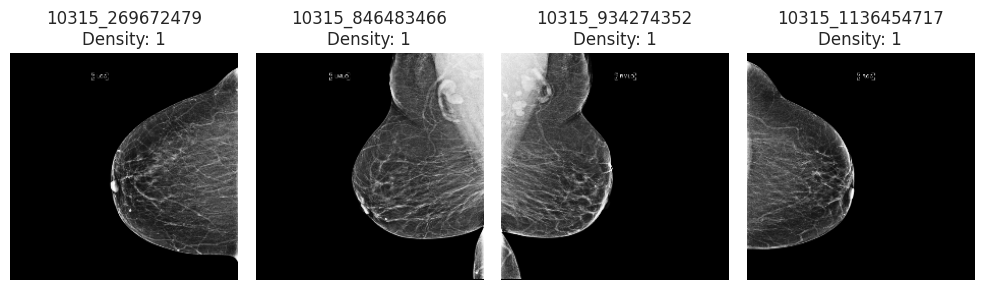

In [24]:
import matplotlib.pyplot as plt

# Function to display a few images from the dataset with {patient_id}_{image_id} and density
def display_sample_images(dataset, num_images=4):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        # Get a sample from the dataset
        image, label, patient_id, image_id = dataset[i]
        
        # Convert to grayscale by taking only one channel, e.g., the first channel
        image = image[0]  # Assuming the image is (3, H, W), take the first channel
        
        # Plot the image in grayscale
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
        plt.axis("off")
        ax.set_title(f"{patient_id}_{image_id}\nDensity: {label}")  # Adding density label

    plt.tight_layout()
    plt.show()

# Display sample images from test_dataset
display_sample_images(val_dataset, num_images=4)

**VIEW OF TEST DATASET**

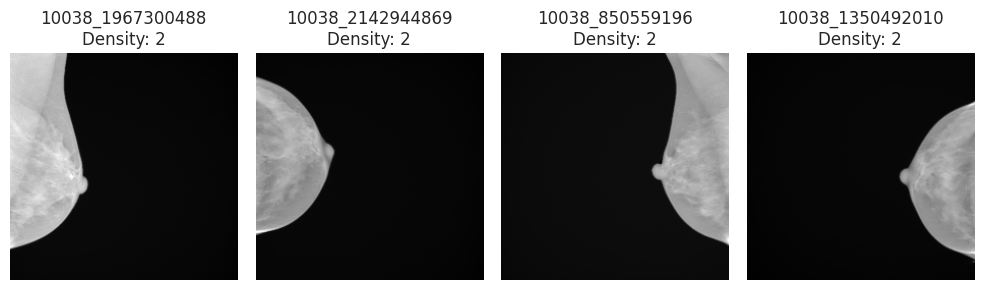

In [25]:
import matplotlib.pyplot as plt

# Function to display a few images from the dataset with {patient_id}_{image_id} and density
def display_sample_images(dataset, num_images=4):
    plt.figure(figsize=(10, 10))
    
    for i in range(num_images):
        # Get a sample from the dataset
        image, label, patient_id, image_id = dataset[i]
        
        # Convert to grayscale by taking only one channel, e.g., the first channel
        image = image[0]  # Assuming the image is (3, H, W), take the first channel
        
        # Plot the image in grayscale
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(image, cmap='gray')  # Use 'gray' colormap for grayscale display
        plt.axis("off")
        ax.set_title(f"{patient_id}_{image_id}\nDensity: {label}")  # Adding density label

    plt.tight_layout()
    plt.show()

# Display sample images from test_dataset
display_sample_images(test_dataset, num_images=4)

# DeiT (Data-efficient Image Transformers) - 2020

In [26]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


**Code to Define the Model**

In [27]:
import torch
import timm
import torch.nn as nn
from torchsummary import summary

# Initialize the model
model = timm.create_model('deit_base_patch16_224', pretrained=True)

# Adjust the final layer for your specific number of classes
num_classes = 4  # Modify as needed for your dataset
in_features = model.get_classifier().in_features
model.head = nn.Linear(in_features, num_classes)

# Move model to GPU if available and wrap with DataParallel for multiple GPUs
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs!")
    model = nn.DataParallel(model)  # This will parallelize across multiple GPUs
model = model.to(device)


# Calculate total and trainable parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

# Print model architecture and parameter details
#print(f"Model Architecture:\n{model}")
print(f"\nTotal Parameters: {total_params:,}")
print(f"Trainable Parameters: {trainable_params:,}")

# Calculate model size in MB
param_size = 4  # Size of each parameter in bytes (float32 takes 4 bytes)
model_size_mb = total_params * param_size / (1024 ** 2)
print(f"Model Size: {model_size_mb:.2f} MB")

# Print a detailed summary of the model layers (optional, may be long)
#print("\nDetailed Model Summary:")
#summary(model, (3, 224, 224))

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Using 2 GPUs!

Total Parameters: 85,801,732
Trainable Parameters: 85,801,732
Model Size: 327.31 MB


# TRAINING LOOP

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/50, Train Loss: 0.6506, Train Acc: 0.7093, Val Loss: 0.5582, Val Acc: 0.7533
Best model updated.
Epoch 1 completed in 541.48 seconds.


Epoch 2/50, Train Loss: 0.5814, Train Acc: 0.7402, Val Loss: 0.5244, Val Acc: 0.7674
Best model updated.
Epoch 2 completed in 521.56 seconds.


Epoch 3/50, Train Loss: 0.5625, Train Acc: 0.7492, Val Loss: 0.5119, Val Acc: 0.7866
Best model updated.
Epoch 3 completed in 521.42 seconds.


Epoch 4/50, Train Loss: 0.5590, Train Acc: 0.7536, Val Loss: 0.5305, Val Acc: 0.7688
Epoch 4 completed in 521.29 seconds.


Epoch 5/50, Train Loss: 0.5487, Train Acc: 0.7603, Val Loss: 0.5440, Val Acc: 0.7627
Epoch 5 completed in 521.62 seconds.


Epoch 6/50, Train Loss: 0.5395, Train Acc: 0.7640, Val Loss: 0.5368, Val Acc: 0.7674
Epoch 6 completed in 522.07 seconds.


Epoch 7/50, Train Loss: 0.5270, Train Acc: 0.7686, Val Loss: 0.5227, Val Acc: 0.7699
Epoch 7 completed in 521.31 seconds.


Epoch 8/50, Train Loss: 0.4981, Train Acc: 0.7791, Val Loss: 0.5202, Val Acc: 0.7739
Epoch 8 completed in 520.66 seconds.


Epoch 9/50, Train Loss: 0.4872, Train Acc: 0.7851, Val Loss: 0.5311, Val Acc: 0.7746
Epoch 9 completed in 520.46 seconds.


Epoch 10/50, Train Loss: 0.4719, Train Acc: 0.7928, Val Loss: 0.5277, Val Acc: 0.7833
Epoch 10 completed in 520.26 seconds.


Epoch 11/50, Train Loss: 0.4658, Train Acc: 0.7968, Val Loss: 0.5590, Val Acc: 0.7518
Epoch 11 completed in 520.64 seconds.


Epoch 12/50, Train Loss: 0.4332, Train Acc: 0.8111, Val Loss: 0.5652, Val Acc: 0.7725
Epoch 12 completed in 521.62 seconds.


Epoch 13/50, Train Loss: 0.4230, Train Acc: 0.8168, Val Loss: 0.5691, Val Acc: 0.7678
Early stopping triggered.

Total Training Time: 113 minutes, 15.35 seconds.
Best model weights saved to 'best_deit_model.pth'.


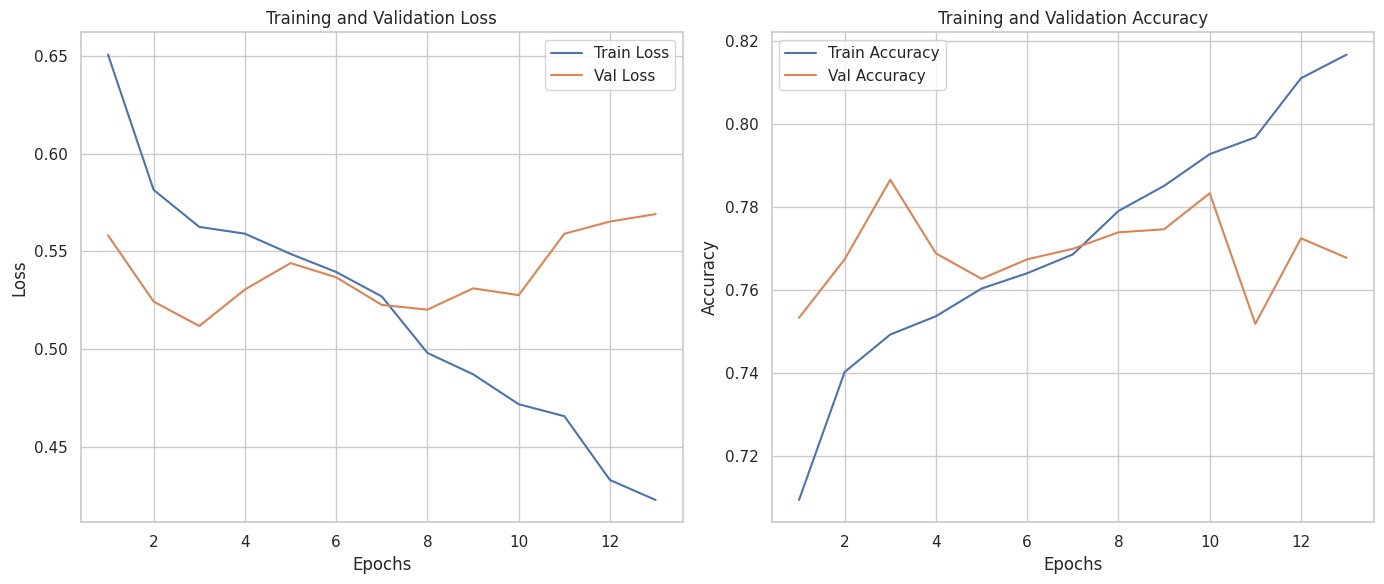

In [28]:
import time
import torch
import timm
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Hyperparameters
batch_size = 32
learning_rate = 1e-4
epochs = 50  # Increased to allow early stopping
patience = 10  # Early stopping patience

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

# Define optimizer and adaptive learning rate scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

# Loss function
criterion = nn.CrossEntropyLoss()

# Training tracking variables
best_val_accuracy = 0.0
best_model_weights = None
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []
no_improve_epochs = 0  # Track epochs without improvement for early stopping

# Track total training time
start_time = time.time()

# Training and validation loops
for epoch in range(epochs):
    epoch_start_time = time.time()

    # Training loop with progress bar
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs} - Training", leave=False)
    for images, labels, _, _ in train_bar:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct_train += (preds == labels).sum().item()  # Calculate train accuracy
        train_bar.set_postfix({"Batch Loss": loss.item()})

    # Calculate training loss and accuracy
    train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop with progress bar
    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    val_bar = tqdm(val_loader, desc=f"Epoch {epoch+1}/{epochs} - Validation", leave=False)
    with torch.no_grad():
        for images, labels, _, _ in val_bar:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            correct_val += (preds == labels).sum().item()
            val_bar.set_postfix({"Batch Loss": loss.item()})

    # Calculate validation loss and accuracy
    val_loss = total_val_loss / len(val_loader)
    val_accuracy = correct_val / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    # Adaptive learning rate scheduler step
    scheduler.step(val_loss)

    # Print statistics for the epoch
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    # Check if current model is the best
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_weights = model.state_dict()  # Save best model weights
        no_improve_epochs = 0  # Reset early stopping counter
        print("Best model updated.")
    else:
        no_improve_epochs += 1  # Increase early stopping counter

    # Early stopping check
    if no_improve_epochs >= patience:
        print("Early stopping triggered.")
        break

    # Track time per epoch
    epoch_time = time.time() - epoch_start_time
    print(f"Epoch {epoch+1} completed in {epoch_time:.2f} seconds.")

# Calculate total training time
total_time = time.time() - start_time
print(f"\nTotal Training Time: {total_time // 60:.0f} minutes, {total_time % 60:.2f} seconds.")

# Load best model weights
model.load_state_dict(best_model_weights)

# Save best model weights
torch.save(best_model_weights, 'best_deit_model.pth')
print("Best model weights saved to 'best_deit_model.pth'.")

# Plot training and validation curves
epochs_range = range(1, len(train_losses) + 1)
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

In [29]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
model.eval()
correct = 0
with torch.no_grad():
    for images, labels, _, _ in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()

test_accuracy = correct / len(test_loader.dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7875


**Classification Report**

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.65      0.65      0.65       301
     Class 1       0.77      0.77      0.77      1198
     Class 2       0.79      0.83      0.81      1116
     Class 3       0.74      0.54      0.62       145

    accuracy                           0.77      2760
   macro avg       0.74      0.70      0.71      2760
weighted avg       0.77      0.77      0.77      2760



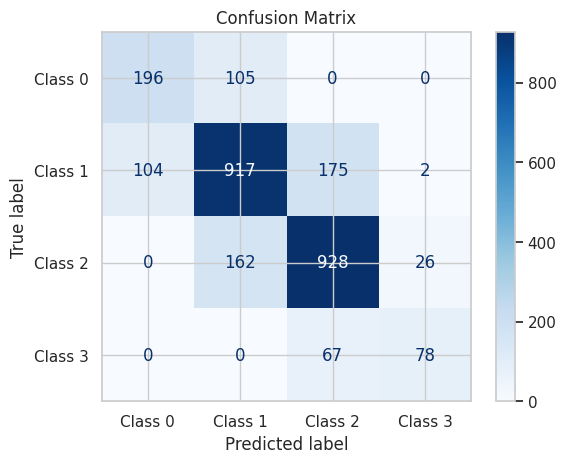

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# After training, evaluate on the test or validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels, _, _ in val_loader:  # Use validation or test loader
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate Classification Report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=[f"Class {i}" for i in range(num_classes)]))

# Compute Sensitivity (Recall) for Each Class
# Sensitivity is already included in the classification report as recall.

# Generate and Plot Confusion Matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[f"Class {i}" for i in range(num_classes)])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

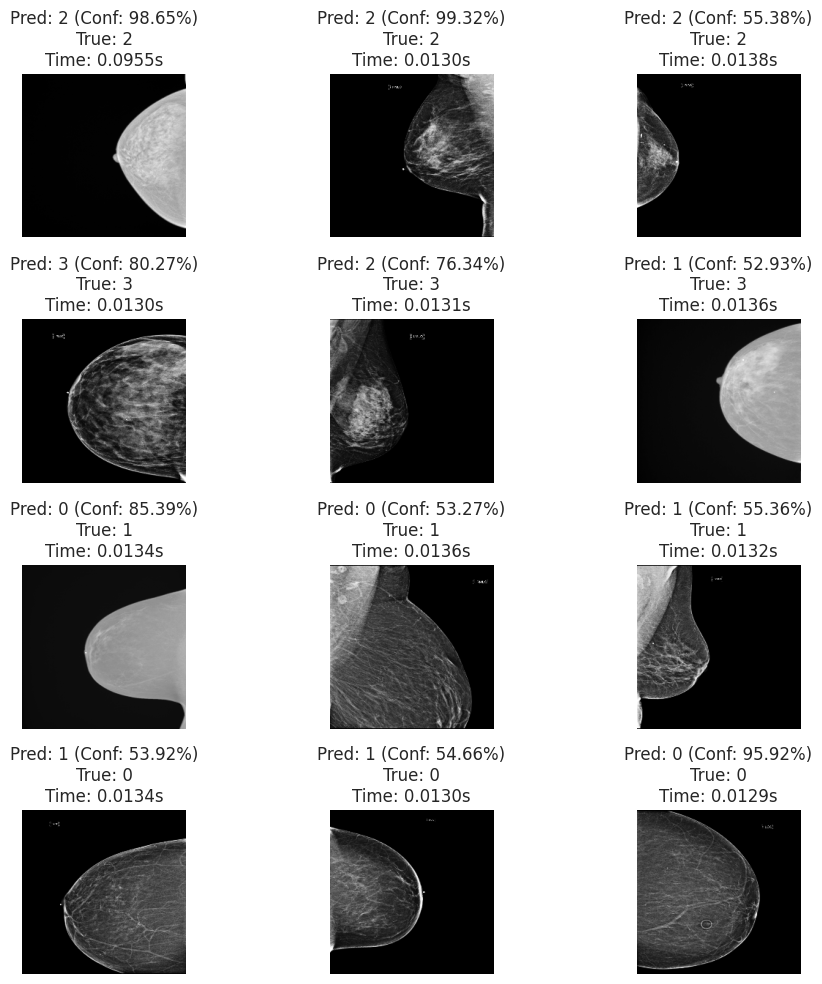

In [31]:
import random
import matplotlib.pyplot as plt
import torch.nn.functional as F  # For softmax function
import time  # Import time module to measure inference time

def display_predictions_per_category(dataset, model, num_images_per_category=2):
    model.eval()
    plt.figure(figsize=(10, 10))
    
    # Create a dictionary to hold images by their category labels
    category_dict = {}
    
    for i in range(len(dataset)):
        image, label, patient_id, image_id = dataset[i]
        if label.item() not in category_dict:
            category_dict[label.item()] = []
        category_dict[label.item()].append(i)

    # Initialize image index
    img_count = 0

    # Loop through each category
    for category, indices in category_dict.items():
        selected_indices = random.sample(indices, min(num_images_per_category, len(indices)))  # Select random indices for the category
        
        for idx in selected_indices:
            if img_count >= num_images_per_category * len(category_dict):
                break  # Stop if we have reached the total desired number of images
            
            # Get image and label from dataset
            image, label, _, image_id = dataset[idx]
            
            # Move image to GPU and add batch dimension
            with torch.no_grad():
                image = image.unsqueeze(0).to(device)
                
                # Measure inference time
                start_time = time.time()  # Start time
                output = model(image)
                end_time = time.time()  # End time
                inference_time = end_time - start_time  # Calculate inference time
                
                # Calculate confidence score
                probabilities = F.softmax(output, dim=1)  # Apply softmax to get probabilities
                confidence, pred = torch.max(probabilities, 1)  # Get predicted class and its confidence score
            
            # Rearrange image dimensions for Matplotlib
            image = image.squeeze().cpu().numpy()  # Remove batch dimension and convert to numpy array
            if image.ndim == 2:  # If the image is already in HxW format
                image_to_show = image
            elif image.shape[0] == 3:  # If the image is in CxHxW format
                image_to_show = image.transpose(1, 2, 0)  # Convert to HxWxC
                # Convert to grayscale if needed
                if image_to_show.shape[2] == 3:
                    image_to_show = image_to_show.mean(axis=2)  # Convert RGB to grayscale

            # Plotting
            ax = plt.subplot(len(category_dict), num_images_per_category, img_count + 1)
            plt.imshow(image_to_show, cmap='gray')  # Force grayscale
            plt.title(f"Pred: {pred.item()} (Conf: {confidence.item() * 100:.2f}%)\nTrue: {label.item()}\nTime: {inference_time:.4f}s")
            plt.axis("off")
            
            img_count += 1
        
    plt.tight_layout()
    plt.show()

# Call function to display predictions from each category
display_predictions_per_category(test_dataset, model, num_images_per_category=3)